## Multiple Logistic Regression

Extend your logistic regression skills to multiple explanatory variables. Understand the logistic distribution, which underpins this form of regression. Finally, implement your own logistic regression algorithm.

### Visualizing multiple explanatory variables
Logistic regression also supports multiple explanatory variables. Plotting has similar issues as the linear regression case: it quickly becomes difficult to include more numeric variables in the plot. Here we'll look at the case of two numeric explanatory variables, and the solution is basically the same as before: use color to denote the response.

Here there are only two possible values of response (zero and one), and later when we add predicted responses, the values all lie between zero and one. Once you include predicted responses, the most important thing to determine from the plot is whether the predictions are close to zero, or close to one. That means that a 2-color gradient split at 0.5 is really useful: responses above 0.5 are one color, and responses below 0.5 are another color.

Warning message:
"package 'fst' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'broom' was built under R version 3.6.3"

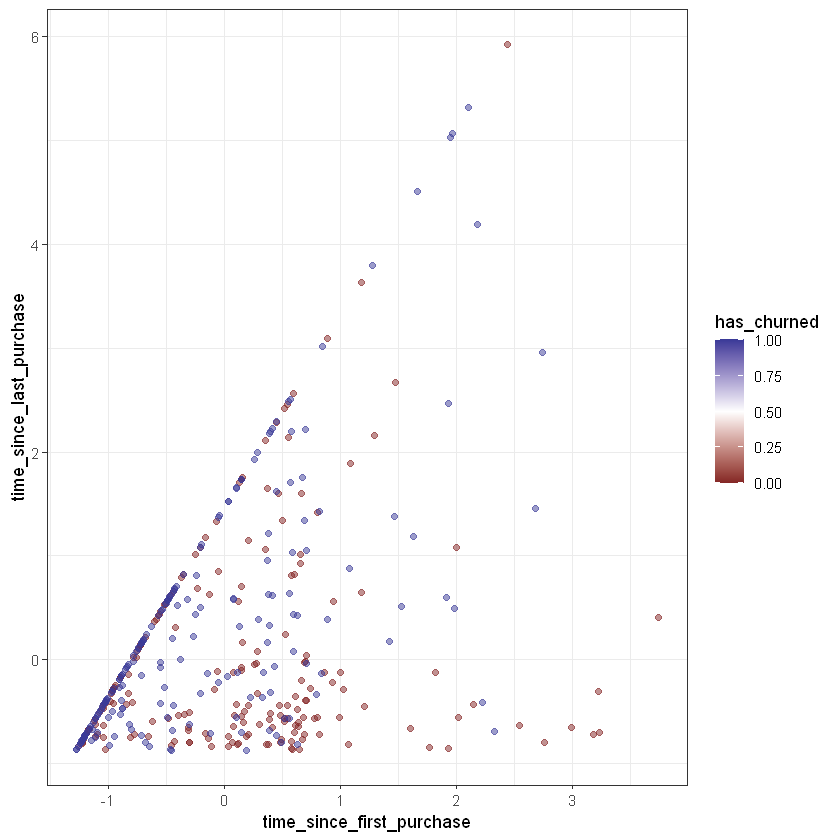

In [1]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
library(broom)

# read and see data 
churn = read_fst("churn.fst")

# Using churn, plot recency vs. length of relationship,
# colored by churn status
ggplot(churn, aes(time_since_first_purchase, time_since_last_purchase, color = has_churned))+
  # Make it a scatter plot, with transparency 0.5
  geom_point(alpha = 0.5) +
  # Use a 2-color gradient split at 0.5
  scale_color_gradient2(midpoint = 0.5) +
  # Use the black and white theme
  theme_bw()

### Logistic regression with 2 explanatory variables
To include multiple explanatory variables in logistic regression models, the syntax is the same as for linear regressions. The only change is the same as in the simple case: you run a generalized linear model with a binomial error family.

Here you'll fit a model of churn status with both of the explanatory variables from the dataset: the length of customer relationship and the recency of purchase.

In [2]:
# Fit a logistic regression of churn status vs. length of
# relationship, recency, and an interaction
mdl_churn_vs_both_inter <- glm(has_churned ~ time_since_first_purchase + time_since_last_purchase + time_since_first_purchase:time_since_last_purchase, data = churn, family = "binomial")

# See the result
mdl_churn_vs_both_inter


Call:  glm(formula = has_churned ~ time_since_first_purchase + time_since_last_purchase + 
    time_since_first_purchase:time_since_last_purchase, family = "binomial", 
    data = churn)

Coefficients:
                                       (Intercept)  
                                           -0.1505  
                         time_since_first_purchase  
                                           -0.6376  
                          time_since_last_purchase  
                                            0.4233  
time_since_first_purchase:time_since_last_purchase  
                                            0.1123  

Degrees of Freedom: 399 Total (i.e. Null);  396 Residual
Null Deviance:	    554.5 
Residual Deviance: 519.8 	AIC: 527.8

### Logistic regression prediction
As with linear regression, the joy of logistic regression is that you can make predictions. Let's step through the prediction flow one more time!

In [4]:
# Make a grid of explanatory data
explanatory_data <- expandgrid(
  # Set len. relationship to seq from -2 to 4 in steps of 0.1
  time_since_first_purchase = seq(-2, 4, 0.1),
  # Set recency to seq from -1 to 6 in steps of 0.1
  time_since_last_purchase = seq(-1, 6, 0.1),
)

# See the result
explanatory_data

time_since_first_purchase,time_since_last_purchase
-2.0,-1
-1.9,-1
-1.8,-1
-1.7,-1
-1.6,-1
-1.5,-1
-1.4,-1
-1.3,-1
-1.2,-1
-1.1,-1


In [5]:
# Add a column of predictions using mdl_churn_vs_both_inter
# and explanatory_data with type response
prediction_data <-  explanatory_data %>% 
  mutate(has_churned = predict(mdl_churn_vs_both_inter, explanatory_data, type = "response"))

# See the result
prediction_data

time_since_first_purchase,time_since_last_purchase,has_churned
-2.0,-1,0.7162561
-1.9,-1,0.7007719
-1.8,-1,0.6848146
-1.7,-1,0.6684090
-1.6,-1,0.6515839
-1.5,-1,0.6343721
-1.4,-1,0.6168101
-1.3,-1,0.5989378
-1.2,-1,0.5807985
-1.1,-1,0.5624381


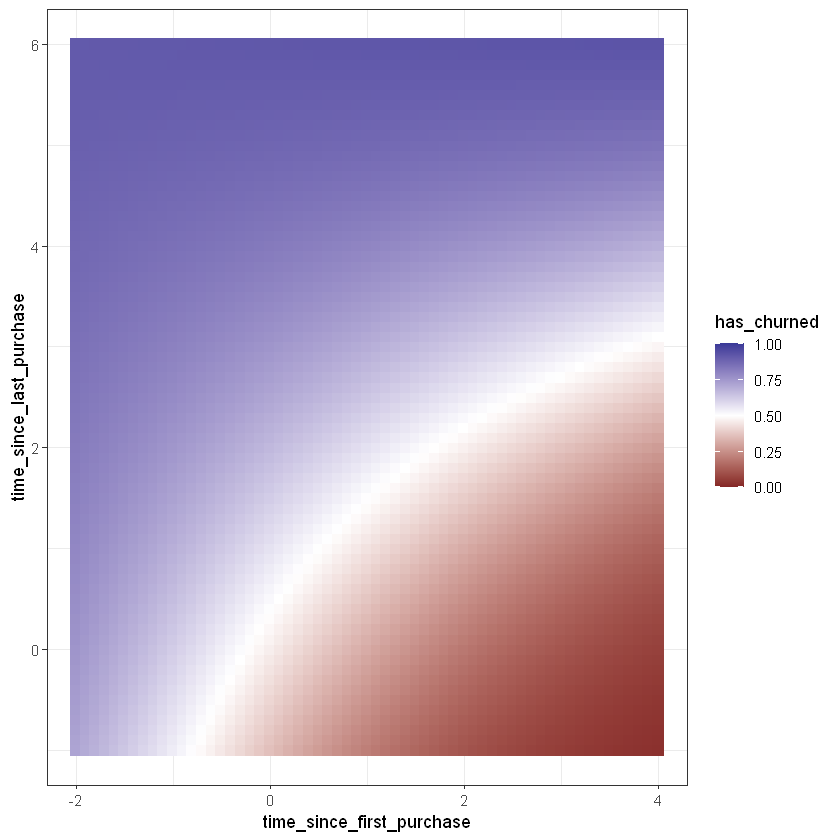

In [9]:
# Extend the plot
ggplot(
  churn, 
  aes(time_since_first_purchase, time_since_last_purchase, color = has_churned)
) +
  geom_point(alpha = 0.5) +
  scale_color_gradient2(midpoint = 0.5) +
  theme_bw() +
  # Add points from prediction_data with size 3 and shape 15
   geom_point(data = prediction_data, size = 3, shape = 15)

### Confusion matrix
When the response variable has just two outcomes, like the case of churn, the measures of success for the model are "how many cases where the customer churned did the model correctly predict?" and "how many cases where the customer didn't churn did the model correctly predict?". These can be found by generating a confusion matrix and calculating summary metrics on it. A mosaic plot is the natural way to visualize the results.

In [10]:
library(yardstick)

# Get the actual responses from churn
actual_response <- churn$has_churned

# Get the predicted responses from the model
predicted_response <- round(fitted(mdl_churn_vs_both_inter))

# Get a table of these values
outcomes <- table(predicted_response, actual_response)

# Convert the table to a conf_mat object
confusion <- conf_mat(outcomes)

# See the result
confusion

Warning message:
"package 'yardstick' was built under R version 3.6.3"For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


                  actual_response
predicted_response   0   1
                 0 102  53
                 1  98 147

.metric,.estimator,.estimate
accuracy,binary,0.6225000
kap,binary,0.2450000
sens,binary,0.7350000
spec,binary,0.5100000
ppv,binary,0.6000000
npv,binary,0.6580645
mcc,binary,0.2514474
j_index,binary,0.2450000
bal_accuracy,binary,0.6225000
detection_prevalence,binary,0.6125000


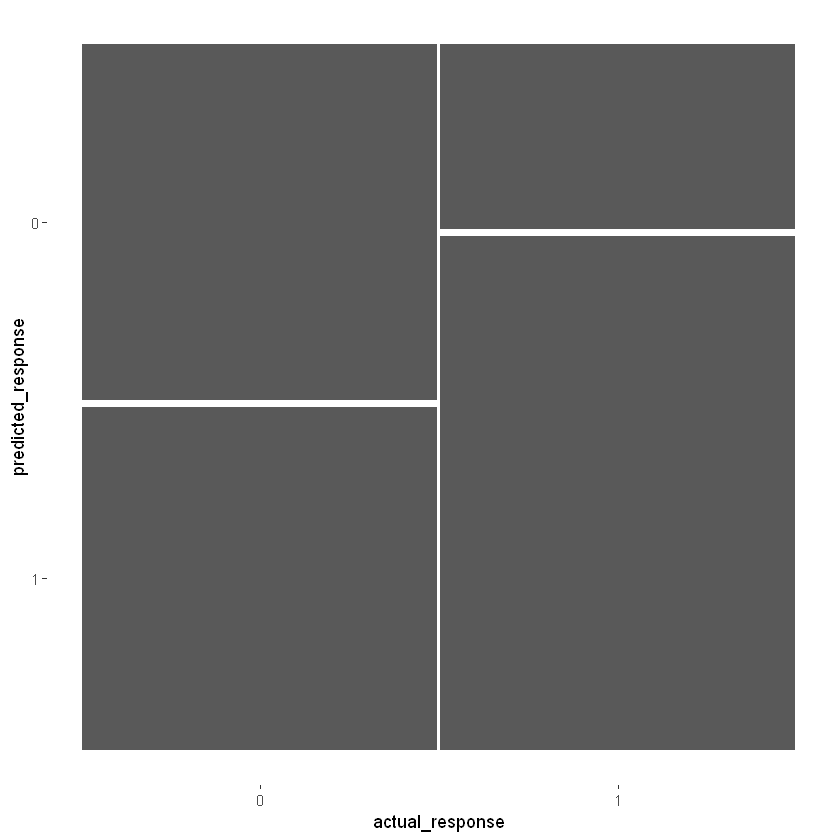

In [11]:
# "Automatically" plot the confusion matrix
autoplot(confusion)

# Get summary metrics
summary(confusion, event_level = "second")

### Cumulative distribution function
Understanding the logistic distribution is key to understanding logistic regression. Like the normal (Gaussian) distribution, it is a probability distribution of a single continuous variable. Here you'll visualize the cumulative distribution function (CDF) for the logistic distribution. That is, if you have a logistically distributed variable, x, and a possible value, xval, that x could take, then the CDF gives the probability that x is less than xval.

The logistic distribution's CDF is calculated with the logistic function (hence the name). The plot of this has an S-shape, known as a sigmoid curve. An important property of this function is that it takes an input that can be any number from minus infinity to infinity, and returns a value between zero and one.

In [13]:
logistic_distn_cdf <- tibble(
  # Make a seq from -10 to 10 in steps of 0.1
  x = seq(-10,10, 0.1),
  # Transform x with built-in logistic CDF
  logistic_x = plogis(x),
  # Transform x with manual logistic
  logistic_x_man = 1/(1+ exp(-x))
) 

# Check that each logistic function gives the same results
all.equal(
  logistic_distn_cdf$logistic_x, 
  logistic_distn_cdf$logistic_x_man
)

[1] TRUE

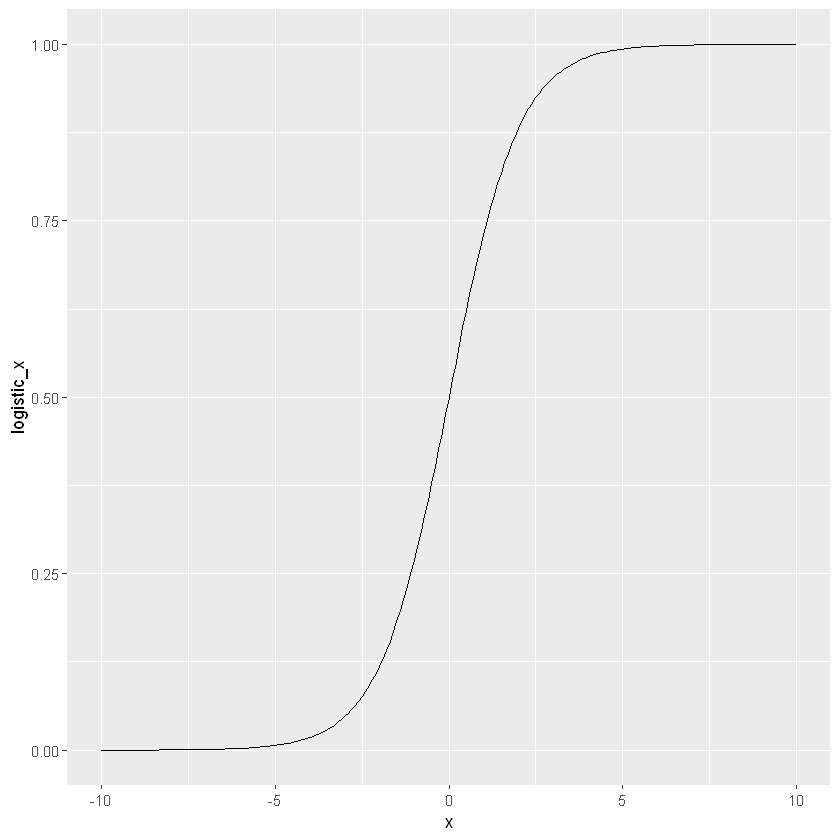

In [15]:
# Using logistic_distn_cdf, plot logistic_x vs. x
ggplot(logistic_distn_cdf, aes(x = x, y = logistic_x )) +
  # Make it a line plot
  geom_line()

### Inverse cumulative distribution function
The logistic function (logistic distribution CDF) has another important property: each x input value is transformed to a unique value. That means that the transformation can be reversed. The logit function is the name for the inverse logistic function, which is also the logistic distribution inverse cumulative distribution function. (All three terms mean exactly the same thing.)

The logit function takes values between zero and one, and returns values between minus infinity and infinity.

In [16]:
logistic_distn_inv_cdf <- tibble(
  # Make a seq from 0.001 to 0.999 in steps of 0.001
  p = seq(0.001, 0.999, 0.001),
  # Transform with built-in logistic inverse CDF
  logit_p = qlogis(p),
  # Transform with manual logit
  logit_p_man = log(p/(1-p))
) 

# Check that each logistic function gives the same results
all.equal(
  logistic_distn_inv_cdf$logit_p,
  logistic_distn_inv_cdf$logit_p_man
)

[1] TRUE

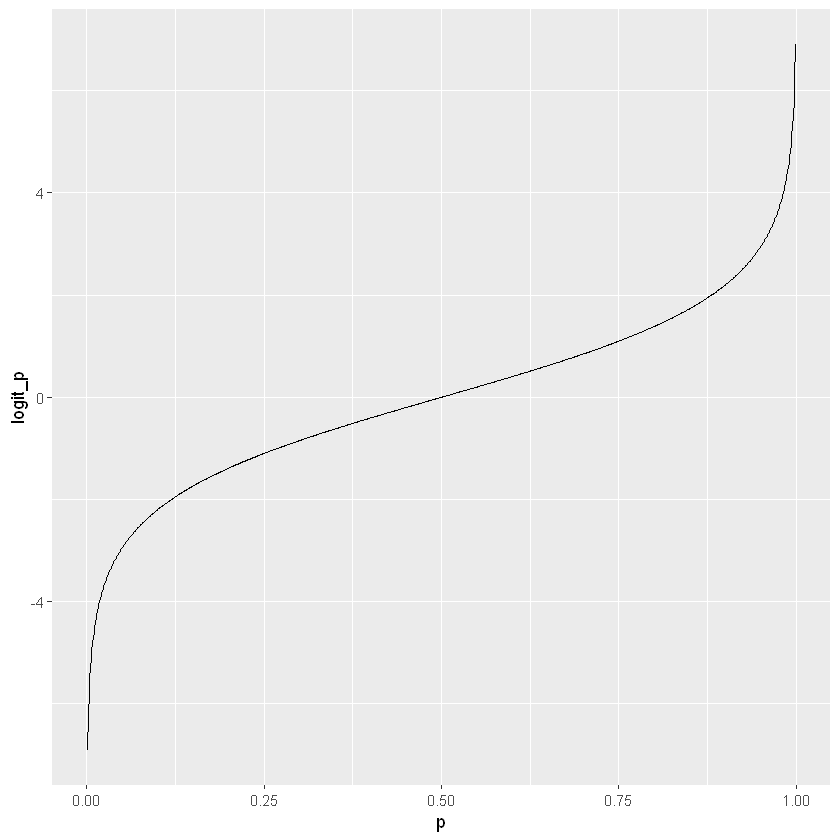

In [19]:
# Using logistic_distn_inv_cdf, plot logit_p vs. p
ggplot(logistic_distn_inv_cdf, aes(x = p, y = logit_p )) +
  # Make it a line plot
  geom_line()

# The inverse CDF is the “opposite” transformation to the CDF. If you flip the x and y axes on this plot, 
# you get the same plot you saw in the previous exercise.

### binomial family argument
The big difference between running a linear regression with lm() and running a logistic regression with glm() is that you have to set glm()'s family argument to binomial. binomial() is a function that returns a list of other functions that tell glm() how to perform calculations in the regression. The two most interesting functions are linkinv and linkfun, which are used for transforming variables from the whole number line (minus infinity to infinity) to probabilities (zero to one) and back again.

In [21]:
x = seq(-10,10, 0.1)
p = seq(0.001, 0.999, 0.001)

# Look at the structure of binomial() function
str(binomial())

# Call the link inverse on x
linkinv_x <- binomial()$linkinv(x)

# Check linkinv_x and plogis() of x give same results 
all.equal(linkinv_x, plogis(x))

# Call the link fun on p
linkfun_p <- binomial()$linkfun(p)

# Check linkfun_p and qlogis() of p give same results  
all.equal(linkfun_p, qlogis(p))

List of 12
 $ family    : chr "binomial"
 $ link      : chr "logit"
 $ linkfun   :function (mu)  
 $ linkinv   :function (eta)  
 $ variance  :function (mu)  
 $ dev.resids:function (y, mu, wt)  
 $ aic       :function (y, n, mu, wt, dev)  
 $ mu.eta    :function (eta)  
 $ initialize:  expression({  if (NCOL(y) == 1) {  if (is.factor(y))  y <- y != levels(y)[1L]  n <- rep.int(1, nobs)  y[weights =| __truncated__
 $ validmu   :function (mu)  
 $ valideta  :function (eta)  
 $ simulate  :function (object, nsim)  
 - attr(*, "class")= chr "family"


[1] TRUE

[1] TRUE

### Logistic regression algorithm
Let's dig into the internals and implement a logistic regression algorithm. Since R's glm() function is very complex, you'll stick to implementing simple logistic regression for a single dataset.

Rather than using sum of squares as the metric, we want to use likelihood. However, log-likelihood is more computationally stable, so we'll use that instead. Actually, there is one more change: since we want to maximize log-likelihood, but optim() defaults to finding minimum values, it is easier to calculate the negative log-likelihood.

The log-likelihood value for each observation is

log(y_pred) * y_actual + log(1-y_pred) * (1- y_actual)

The metric to calculate is minus the sum of these log-likelihood contributions.

In [22]:
x_actual = churn$time_since_last_purchase
y_actual = churn$has_churned

# Set the intercept to 1
intercept <- 1

# Set the slope to 0.5
slope <- 0.5

# Calculate the predicted y values
y_pred <- plogis(intercept + slope * x_actual)

# Calculate the log-likelihood for each term
log_likelihoods <- log(y_pred) * y_actual + log(1- y_pred)*(1-y_actual)

# Calculate minus the sum of the log-likelihoods for each term
-sum(log_likelihoods)

[1] 326.2599

In [23]:
calc_neg_log_likelihood <- function(coeffs) {
  # Get the intercept coeff
  intercept <- coeffs[1]

  # Get the slope coeff
  slope <- coeffs[2]

  # Calculate the predicted y values
  y_pred <- plogis(intercept + slope * x_actual)

  # Calculate the log-likelihood for each term
  log_likelihoods <- log(y_pred) * y_actual + log(1- y_pred)*(1-y_actual)

  # Calculate minus the sum of the log-likelihoods for each term
  -sum(log_likelihoods)
}

In [24]:
# Optimize the metric
optim(
  # Initially guess 0 intercept and 1 slope
  par = c(intercept = 0, slope = 1),
  # Use calc_neg_log_likelihood as the optimization fn 
  fn =  calc_neg_log_likelihood
)

# Compare the coefficients to those calculated by glm()
glm(has_churned ~ time_since_last_purchase, data = churn, family = binomial)

$par
  intercept       slope 
-0.03478255  0.26890041 

$value
[1] 273.2002

$counts
function gradient 
      51       NA 

$convergence
[1] 0

$message
NULL


Call:  glm(formula = has_churned ~ time_since_last_purchase, family = binomial, 
    data = churn)

Coefficients:
             (Intercept)  time_since_last_purchase  
                -0.03502                   0.26921  

Degrees of Freedom: 399 Total (i.e. Null);  398 Residual
Null Deviance:	    554.5 
Residual Deviance: 546.4 	AIC: 550.4